# Proyecto AI 2

## Clasificación de la causa del accidente cerebro vascular

In [ ]:
from google.colab import files
from IPython.display import Image
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import os
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-2-uis-student/projects/20220916')

print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-2-uis-student/projects/20220916


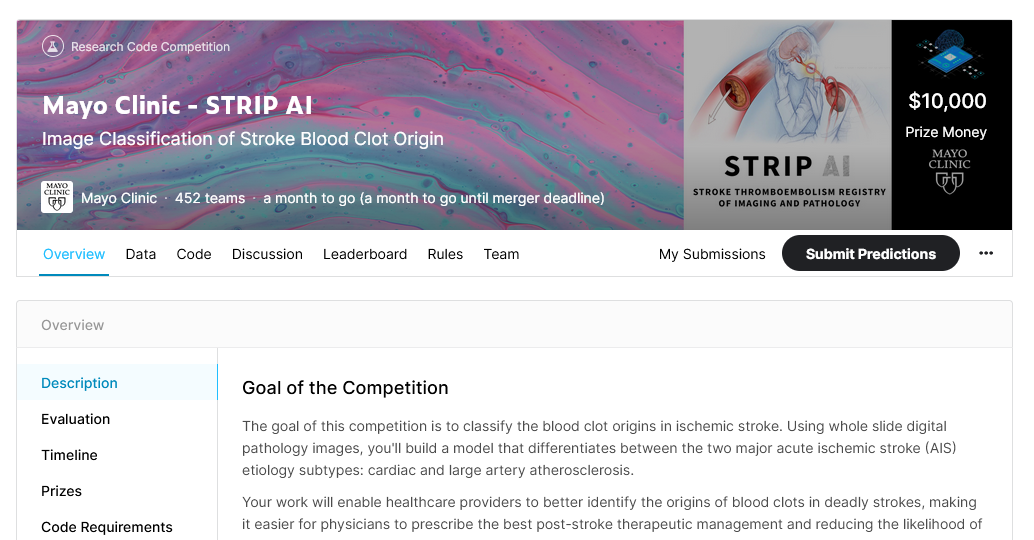

In [ ]:
Image('img01.png')

In [ ]:
# Lectura dataFrame
df = pd.read_csv('images_labels_1000.csv')
df

Unnamed: 0              image  label
0              0  22ee77_0_2101.png      0
1              1   217b27_0_247.png      1
2              2   2b7304_1_669.png      2
3              3   151856_0_437.png      0
4              4  006388_0_7157.png      1
...          ...                ...    ...
2995        2995  291099_0_1697.png      1
2996        2996  41b23c_0_2159.png      2
2997        2997  283ec7_0_5601.png      0
2998        2998   2eb2d7_0_599.png      1
2999        2999  4919a7_0_5527.png      2

[3000 rows x 3 columns]

In [ ]:
df = df.head(1500)
df

Unnamed: 0              image  label
0              0  22ee77_0_2101.png      0
1              1   217b27_0_247.png      1
2              2   2b7304_1_669.png      2
3              3   151856_0_437.png      0
4              4  006388_0_7157.png      1
...          ...                ...    ...
1495        1495  3020ef_0_1391.png      1
1496        1496   50ba15_0_709.png      2
1497        1497    0b1bdc_0_87.png      0
1498        1498  006388_0_5919.png      1
1499        1499  2b7304_1_3503.png      2

[1500 rows x 3 columns]

In [ ]:
imgs = []
lbls = []
for index, row in df.iterrows():
    imgs.append(cv2.imread('Dataset/{:s}'.format(row['image'])))
    lbls.append(row['label'])

imgs = np.array(imgs)
lbls = np.array(lbls)
print(imgs.shape, '|', lbls.shape)

(3000, 256, 256, 3) | (3000,)


In [ ]:
# Procesar para que queden listos para la red
imgs = imgs.astype('float32')
imgs /= 255
# Y guardar la información ya procesada, por cualquier eventualidad
np.save('imgs.npy', imgs)
np.save('lbls.npy', lbls)

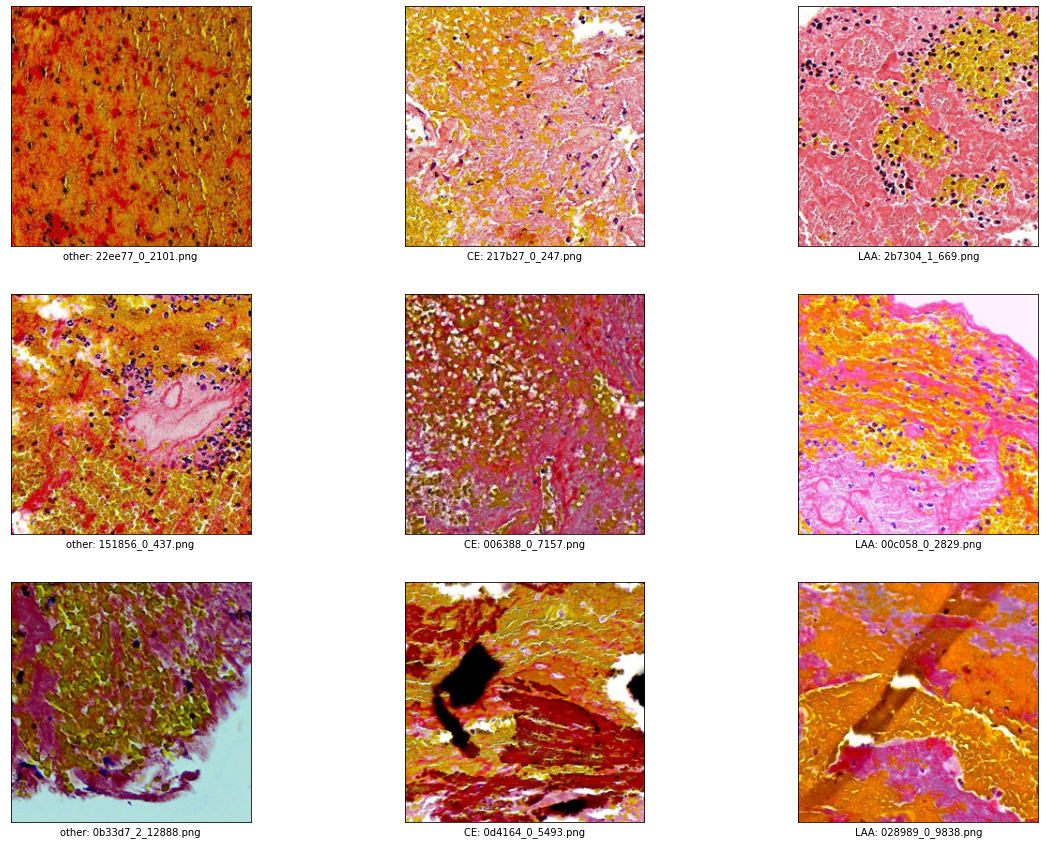

In [ ]:
# Detalle de algunas imágenes a usarse
plt.figure(figsize=(20, 15))
for i in range(0, 9, 3):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread('Dataset/'+list(df['image'])[i]), cv2.COLOR_BGR2RGB))
    plt.xlabel('other: '+list(df['image'])[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 3, i+2)
    plt.imshow(cv2.cvtColor(cv2.imread('Dataset/'+list(df['image'])[i+1]), cv2.COLOR_BGR2RGB))
    plt.xlabel('CE: '+list(df['image'])[i+1])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 3, i+3)
    plt.imshow(cv2.cvtColor(cv2.imread('Dataset/'+list(df['image'])[i+2]), cv2.COLOR_BGR2RGB))
    plt.xlabel('LAA: '+list(df['image'])[i+2])
    plt.xticks([])
    plt.yticks([])

In [ ]:
# Cargar los datos guardados
imgs = np.load('imgs.npy')
lbls = np.load('lbls.npy')

In [ ]:
# Separar entrenamiento de pruebas
X_train, X_test, y_train, y_test = train_test_split(imgs, lbls, train_size=0.8)

In [ ]:
# Limpiamos RAM
import gc
del imgs
del lbls
gc.collect()

170

In [ ]:
print('Entrenamiento:', X_train.shape,'->', y_train.shape)
print('Pruebas:', X_test.shape,'->', y_test.shape)

Entrenamiento: (2400, 256, 256, 3) -> (2400,)
Pruebas: (600, 256, 256, 3) -> (600,)


In [ ]:
y_train_one = tf.one_hot(y_train, 3)
y_test_one = tf.one_hot(y_test, 3)

In [ ]:
print('Entrenamiento:', X_train.shape,'->', y_train_one.shape)
print('Pruebas:', X_test.shape,'->', y_test_one.shape)

Entrenamiento: (2400, 256, 256, 3) -> (2400, 3)
Pruebas: (600, 256, 256, 3) -> (600, 3)


In [ ]:
del y_train
del y_test
gc.collect()

88

In [ ]:
gc.collect()

22

<hr>

### CNNs 

1.   xception sin fine tunning
2.   xception con fine tunning
3.   CNN propia


##### **xception sin fine tunning**

In [ ]:
# Descargamos la red que vamos a utilizar
model_xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=X_train[0].shape
)

In [ ]:
# Definimos que no la vamos a reentrenar
model_xception.trainable = False

In [ ]:
# Y visualizamos para ver las capas que tiene y a futuro escoger las capas que le vamos a aplicar fine tunning
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
model_xception_pr = tf.keras.Sequential([model_xception, 
                                        tf.keras.layers.GlobalAveragePooling2D(),
                                        tf.keras.layers.Dense(3, activation='softmax')],
                                        name="xception")

In [ ]:
model_xception_pr.summary()
print('Capas a entrenar:', len(model_xception_pr.trainable_variables))

Model: "xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 20,867,627
Trainable params: 6,147
Non-trainable params: 20,861,480
_________________________________________________________________
Capas a entrenar: 2


In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_xception_pr.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# El callback de parada
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
autosave = tf.keras.callbacks.ModelCheckpoint('xception_01.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
results = model_xception_pr.fit(x=X_train, y=y_train_one,
                            epochs=100,
                            verbose=1,
                            batch_size=32,
                            validation_data=(X_test, y_test_one),
                            callbacks=[early_stopping, autosave])

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0789 - accuracy: 0.4225
Epoch 1: val_loss improved from inf to 1.03613, saving model to xception_01.h5
75/75 [==============================] - 34s 287ms/step - loss: 1.0789 - accuracy: 0.4225 - val_loss: 1.0361 - val_accuracy: 0.4683
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 1.0136 - accuracy: 0.4979
Epoch 2: val_loss did not improve from 1.03613
75/75 [==============================] - 17s 224ms/step - loss: 1.0136 - accuracy: 0.4979 - val_loss: 1.0370 - val_accuracy: 0.4483
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.9857 - accuracy: 0.5192
Epoch 3: val_loss did not improve from 1.03613
75/75 [==============================] - 17s 222ms/step - loss: 0.9857 - accuracy: 0.5192 - val_loss: 1.1278 - val_accuracy: 0.4633
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.9604 - accuracy: 0.5400
Epoch 4: val_loss improved from 1.03613 to 1.02326,

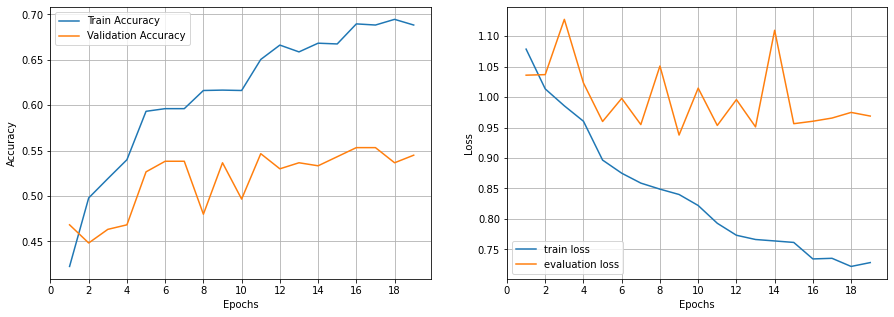

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['accuracy'], label='Train Accuracy');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['loss'], label='train loss');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_loss'], label='evaluation loss');
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();

##### **xception con fine tunning**

In [ ]:
gc.collect()

9817

In [ ]:
# Descargamos la red que vamos a utilizar
model_xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=X_train[0].shape
)

In [ ]:
model_xception.trainable = True

train = False

for lay in model_xception.layers:
    if lay.name == 'block14_sepconv1':
        train = True
    if train == False:
        lay.trainable = False

In [ ]:
model_xception_ft = tf.keras.Sequential([model_xception, 
                                                tf.keras.layers.GlobalAveragePooling2D(),
                                                tf.keras.layers.Flatten(),
                                                tf.keras.layers.Dense(3, activation='softmax')],
                                                name='xception_ft')
model_xception_ft.summary()
print('Capas a entrenar:', len(model_xception_ft.trainable_variables))

Model: "xception_ft"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 20,867,627
Trainable params: 4,754,947
Non-trainable params: 16,112,680
_________________________________________________________________
Capas a entrenar: 10


In [ ]:
# Para ir haciendo decaer el learning rate
initial_lr = 0.1
def decay(epoch):
    lrate = initial_lr/(2**epoch)
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decay)

In [ ]:
# Compilar el modelo
opt = tf.keras.optimizers.SGD()
model_xception_ft.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
autosave = tf.keras.callbacks.ModelCheckpoint('xception_02.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
results_ft = model_xception_ft.fit(X_train, y_train_one,
                            epochs=100,
                            verbose=1,
                            batch_size=32,
                            validation_data=(X_test, y_test_one),
                            callbacks=[early_stopping, autosave, lr_scheduler])

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0733 - accuracy: 0.4304
Epoch 1: val_loss improved from inf to 1.09628, saving model to xception_02.h5
75/75 [==============================] - 28s 324ms/step - loss: 1.0733 - accuracy: 0.4304 - val_loss: 1.0963 - val_accuracy: 0.4483 - lr: 0.1000
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.9040 - accuracy: 0.6029
Epoch 2: val_loss improved from 1.09628 to 1.02594, saving model to xception_02.h5
75/75 [==============================] - 19s 259ms/step - loss: 0.9040 - accuracy: 0.6029 - val_loss: 1.0259 - val_accuracy: 0.5067 - lr: 0.0500
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.8185 - accuracy: 0.6546
Epoch 3: val_loss did not improve from 1.02594
75/75 [==============================] - 18s 239ms/step - loss: 0.8185 - accuracy: 0.6546 - val_loss: 1.0434 - val_accuracy: 0.4967 - lr: 0.0250
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.

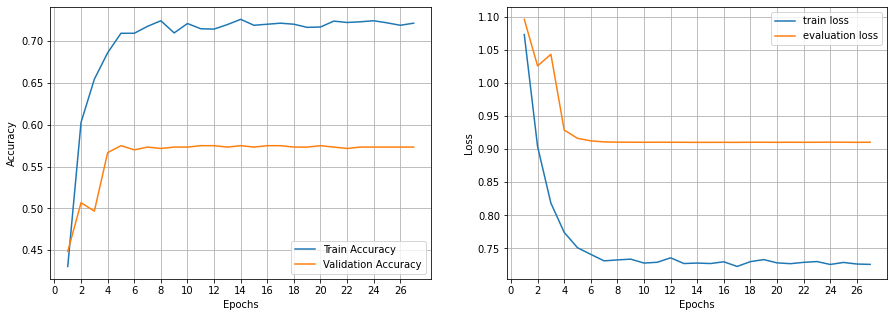

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(1, len(results_ft.history['accuracy'])+1, 1), results_ft.history['accuracy'], label='Train Accuracy');
ax.plot(range(1, len(results_ft.history['accuracy'])+1, 1), results_ft.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0, len(results_ft.history['accuracy'])+1, 2))
ax.grid();
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(1, len(results_ft.history['accuracy'])+1, 1), results_ft.history['loss'], label='train loss');
ax.plot(range(1, len(results_ft.history['accuracy'])+1, 1), results_ft.history['val_loss'], label='evaluation loss');
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
ax.set_xticks(range(0, len(results_ft.history['accuracy'])+1, 2))
ax.grid();
ax.legend();

##### **MobileNetV2**

In [ ]:
gc.collect()

15175

In [ ]:
model_mobilenetv2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=X_train[0].shape
)

In [ ]:
model_mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
model_mobilenetv2.trainable = True
for l in model_mobilenetv2.layers[:100]:
    l.trainable = False

In [ ]:
model_mobile_ft = tf.keras.Sequential([model_mobilenetv2, 
                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')],
                                    name='mobile_ft')

model_mobile_ft.summary()
print('Capas a entrenar:', len(model_mobile_ft.trainable_variables))

Model: "mobile_ft"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_4 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 3,572,803
Trainable params: 3,176,259
Non-trainable params: 396,544
_________________________________________________________________
Capas a entrenar: 58


In [ ]:
initial_lr = 0.1
def decay(epoch):
    lrate = initial_lr/(2**epoch)
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decay)
opt = tf.keras.optimizers.SGD()
model_mobile_ft.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# El callback de parada
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
autosave = tf.keras.callbacks.ModelCheckpoint('mobile_01.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
results = model_mobile_ft.fit(x=X_train, y=y_train_one,
                            epochs=100,
                            verbose=1,
                            batch_size=32,
                            validation_data=(X_test, y_test_one),
                            callbacks=[early_stopping, autosave, lr_scheduler])

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.5923 - accuracy: 0.7471
Epoch 1: val_loss improved from inf to 1.61549, saving model to mobile_01.h5
75/75 [==============================] - 12s 125ms/step - loss: 0.5923 - accuracy: 0.7471 - val_loss: 1.6155 - val_accuracy: 0.3317 - lr: 0.1000
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9300
Epoch 2: val_loss improved from 1.61549 to 1.37555, saving model to mobile_01.h5
75/75 [==============================] - 7s 96ms/step - loss: 0.2136 - accuracy: 0.9300 - val_loss: 1.3756 - val_accuracy: 0.3433 - lr: 0.0500
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9833
Epoch 3: val_loss did not improve from 1.37555
75/75 [==============================] - 7s 91ms/step - loss: 0.0584 - accuracy: 0.9833 - val_loss: 1.7421 - val_accuracy: 0.3550 - lr: 0.0250
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.0222 - a

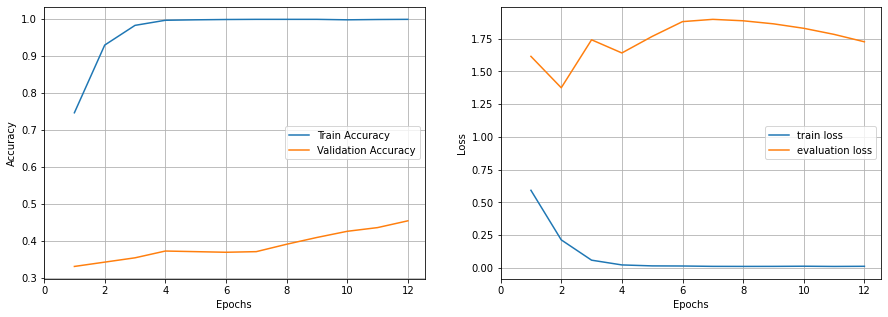

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['accuracy'], label='Train Accuracy');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['loss'], label='train loss');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_loss'], label='evaluation loss');
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();

##### **Red manual**

In [ ]:
model_manual = tf.keras.models.Sequential(name='manual')
model_manual.add(tf.keras.layers.Conv2D(32, (5, 5), 
                activation='relu', 
                padding='valid', 
                input_shape=X_train[0].shape))
model_manual.add(tf.keras.layers.Conv2D(64, (5, 5), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.Conv2D(128, (5, 5), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_manual.add(tf.keras.layers.Conv2D(32, (3, 3), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.Conv2D(64, (3, 3), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.Conv2D(128, (3, 3), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_manual.add(tf.keras.layers.Conv2D(128, (3, 3), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.Conv2D(64, (3, 3), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.Conv2D(32, (3, 3), 
                activation='relu', 
                padding='valid'))
model_manual.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_manual.add(tf.keras.layers.Flatten())
model_manual.add(tf.keras.layers.Dense(2048, activation='relu'))
model_manual.add(tf.keras.layers.Dense(3, activation='softmax'))

In [ ]:
model_manual.summary()

Model: "manual"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 252, 252, 32)      2432      
                                                                 
 conv2d_99 (Conv2D)          (None, 248, 248, 64)      51264     
                                                                 
 conv2d_100 (Conv2D)         (None, 244, 244, 128)     204928    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 122, 122, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 120, 120, 32)      36896     
                                                                 
 conv2d_102 (Conv2D)         (None, 118, 118, 64)      18496     
                                                            

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_mobile_ft.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# El callback de parada
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
autosave = tf.keras.callbacks.ModelCheckpoint('manual_01.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
results = model_mobile_ft.fit(x=X_train, y=y_train_one,
                            epochs=100,
                            verbose=1,
                            batch_size=32,
                            validation_data=(X_test, y_test_one),
                            callbacks=[early_stopping, autosave])

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.9237
Epoch 1: val_loss improved from inf to 1.15263, saving model to manual_01.h5
75/75 [==============================] - 11s 117ms/step - loss: 0.2064 - accuracy: 0.9237 - val_loss: 1.1526 - val_accuracy: 0.4033
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.8829
Epoch 2: val_loss did not improve from 1.15263
75/75 [==============================] - 7s 94ms/step - loss: 0.3210 - accuracy: 0.8829 - val_loss: 4.7339 - val_accuracy: 0.3350
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.2762 - accuracy: 0.9025
Epoch 3: val_loss did not improve from 1.15263
75/75 [==============================] - 7s 92ms/step - loss: 0.2762 - accuracy: 0.9025 - val_loss: 1.3497 - val_accuracy: 0.4250
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.1849 - accuracy: 0.9354
Epoch 4: val_loss did not improve from 1.15263
75/75 [===

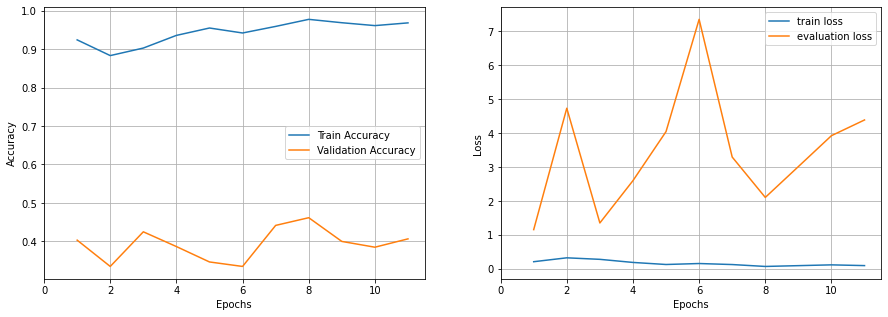

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['accuracy'], label='Train Accuracy');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['loss'], label='train loss');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_loss'], label='evaluation loss');
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();

Cambiando el LR a medida de las epochs

In [ ]:
initial_lr = 0.2
def decay(epoch):
    lrate = initial_lr/(2**epoch)
    return lrate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decay)
opt = tf.keras.optimizers.SGD()
model_mobile_ft.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# El callback de parada
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
autosave = tf.keras.callbacks.ModelCheckpoint('manual_02.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
results = model_mobile_ft.fit(x=X_train, y=y_train_one,
                            epochs=100,
                            verbose=1,
                            batch_size=32,
                            validation_data=(X_test, y_test_one),
                            callbacks=[early_stopping, autosave, lr_scheduler])

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 0.7442 - accuracy: 0.6933
Epoch 1: val_loss improved from inf to 1.93006, saving model to manual_02.h5
75/75 [==============================] - 11s 115ms/step - loss: 0.7442 - accuracy: 0.6933 - val_loss: 1.9301 - val_accuracy: 0.4067 - lr: 0.2000
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.2946 - accuracy: 0.8825
Epoch 2: val_loss did not improve from 1.93006
75/75 [==============================] - 7s 90ms/step - loss: 0.2946 - accuracy: 0.8825 - val_loss: 3.8511 - val_accuracy: 0.3383 - lr: 0.1000
Epoch 3/100
75/75 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9858
Epoch 3: val_loss did not improve from 1.93006
75/75 [==============================] - 7s 91ms/step - loss: 0.0654 - accuracy: 0.9858 - val_loss: 5.4524 - val_accuracy: 0.3417 - lr: 0.0500
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9967
Epoch 4: val_loss 

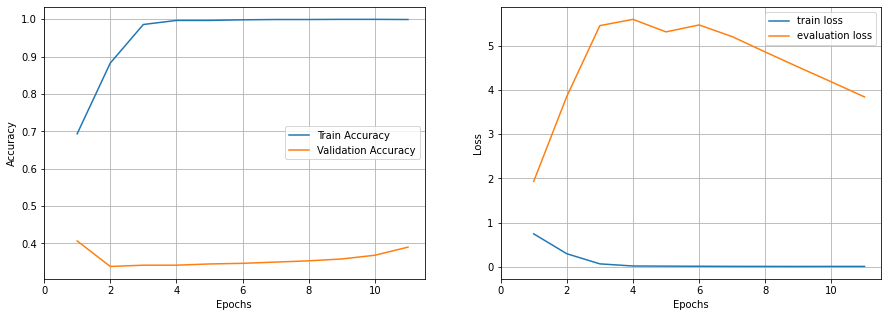

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['accuracy'], label='Train Accuracy');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['loss'], label='train loss');
ax.plot(range(1, len(results.history['accuracy'])+1, 1), results.history['val_loss'], label='evaluation loss');
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');
ax.set_xticks(range(0, len(results.history['accuracy'])+1, 2))
ax.grid();
ax.legend();

## Comparando Train y Test


In [ ]:
tr_1 = []
te_1 = []
tr_2 = []
te_2 = []
tr_0 = []
te_0 = []
for i in range(len(X_train)):
    if y_train[i] == 1 and len(tr_1) < 4:
        tr_1.append(X_train[i, :, :, :])
    elif y_train[i] == 2 and len(tr_2) < 4:
        tr_2.append(X_train[i, :, :, :])
    elif y_train[i] == 0 and len(tr_0) < 4:
        tr_0.append(X_train[i, :, :, :])
    if len(tr_1) == 4 and len(tr_2) == 4 and len(tr_0) == 4:
        break
for i in range(len(X_test)):
    if y_test[i] == 1 and len(te_1) < 4:
        te_1.append(X_test[i, :, :, :])
    elif y_test[i] == 2 and len(te_2) < 4:
        te_2.append(X_test[i, :, :, :])
    elif y_test[i] == 0 and len(te_0) < 4:
        te_0.append(X_test[i, :, :, :])
    if len(te_1) == 4 and len(te_2) == 4 and len(te_0) == 4:
        break

In [ ]:
tr_1 = np.array(tr_1)
te_1 = np.array(te_1)
tr_2 = np.array(tr_2)
te_2 = np.array(te_2)
tr_0 = np.array(tr_0)
te_0 = np.array(te_0)

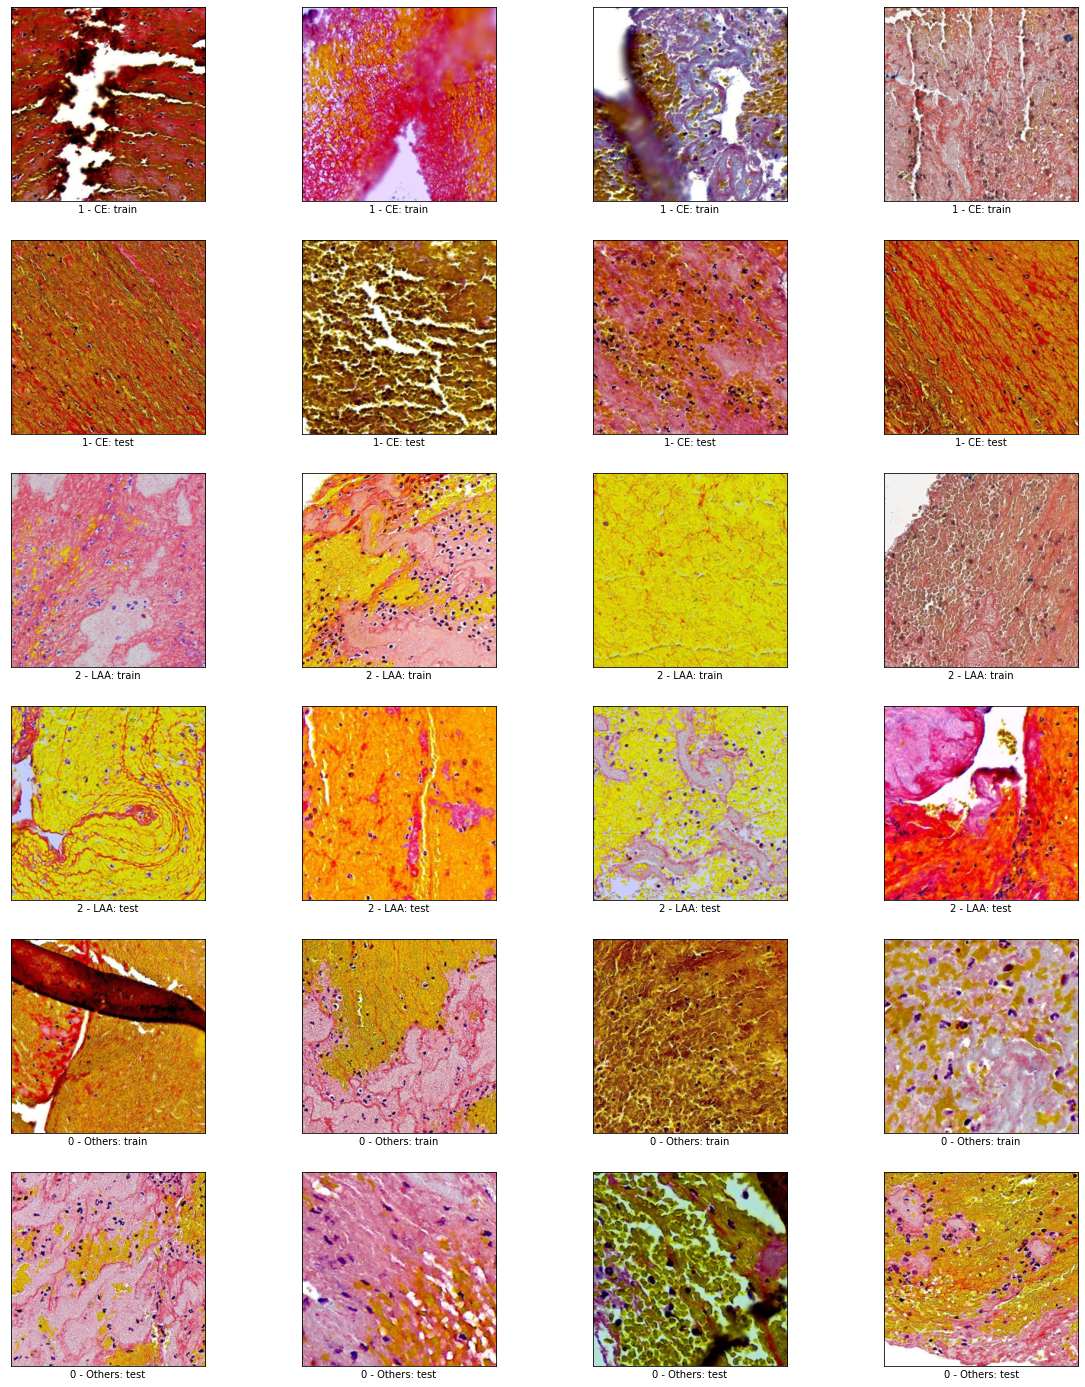

In [ ]:
plt.figure(figsize=(20, 25))

for j in range(4):
    plt.subplot(6, 4, j+1)
    plt.imshow(cv2.cvtColor(tr_1[j, :, :, :], cv2.COLOR_BGR2RGB))
    plt.xlabel('1 - CE: train')
    plt.xticks([])
    plt.yticks([])

for j in range(4):
    plt.subplot(6, 4, j+5)
    plt.imshow(cv2.cvtColor(te_1[j, :, :, :], cv2.COLOR_BGR2RGB))
    plt.xlabel('1- CE: test')
    plt.xticks([])
    plt.yticks([])

for j in range(4):
    plt.subplot(6, 4, j+9)
    plt.imshow(cv2.cvtColor(tr_2[j, :, :, :], cv2.COLOR_BGR2RGB))
    plt.xlabel('2 - LAA: train')
    plt.xticks([])
    plt.yticks([])

for j in range(4):
    plt.subplot(6, 4, j+13)
    plt.imshow(cv2.cvtColor(te_2[j, :, :, :], cv2.COLOR_BGR2RGB))
    plt.xlabel('2 - LAA: test')
    plt.xticks([])
    plt.yticks([])

for j in range(4):
    plt.subplot(6, 4, j+17)
    plt.imshow(cv2.cvtColor(tr_0[j, :, :, :], cv2.COLOR_BGR2RGB))
    plt.xlabel('0 - Others: train')
    plt.xticks([])
    plt.yticks([])

for j in range(4):
    plt.subplot(6, 4, j+21)
    plt.imshow(cv2.cvtColor(te_0[j, :, :, :], cv2.COLOR_BGR2RGB))
    plt.xlabel('0 - Others: test')
    plt.xticks([])
    plt.yticks([])
